<a href="https://colab.research.google.com/github/sohamthirty/Stock-Price-Prediction-with-Sentiment-Analysis/blob/main/TweetData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Twitter data - Kaggle 2015-2020

https://www.kaggle.com/datasets/omermetinn/tweets-about-the-top-companies-from-2015-to-2020/data

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Getting Data

In [3]:
tweet_df = pd.read_csv("/content/drive/MyDrive/DS 5500 - CAPSTONE PROJECT/TwitterData_Kaggle/archive/Tweet.csv")

In [4]:
tweet_df.head()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1


In [5]:
company_tweet_df = pd.read_csv("/content/drive/MyDrive/DS 5500 - CAPSTONE PROJECT/TwitterData_Kaggle/archive/Company_Tweet.csv")

In [6]:
company_tweet_df.head()

,tweet_id,ticker_symbol
0,550803612197457920,AAPL
1,550803610825928706,AAPL
2,550803225113157632,AAPL
3,550802957370159104,AAPL
4,550802855129382912,AAPL


In [7]:
company_df = pd.read_csv("/content/drive/MyDrive/DS 5500 - CAPSTONE PROJECT/TwitterData_Kaggle/archive/Company.csv")

In [8]:
company_df.head()

,ticker_symbol,company_name
0,AAPL,apple
1,GOOG,Google Inc
2,GOOGL,Google Inc
3,AMZN,Amazon.com
4,TSLA,Tesla Inc


In [9]:
# Merge dataset by tweet_id to get which tweet corresponds to which ticker
tweet_company_merge = pd.merge(tweet_df,company_tweet_df,on='tweet_id',how='inner')
tweet_company_merge.head()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL


In [10]:
# Date to correct format
tweet_company_merge['post_date'] = pd.to_datetime(tweet_company_merge['post_date'], unit='s')
tweet_company_merge.head()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol
0,550441509175443456,VisualStockRSRC,2015-01-01 00:00:57,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL
1,550441672312512512,KeralaGuy77,2015-01-01 00:01:36,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL
2,550441732014223360,DozenStocks,2015-01-01 00:01:50,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN
3,550442977802207232,ShowDreamCar,2015-01-01 00:06:47,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA
4,550443807834402816,i_Know_First,2015-01-01 00:10:05,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL


In [11]:
# Separate date and time
tweet_company_merge['date'] = tweet_company_merge['post_date'].dt.date
tweet_company_merge['time'] = tweet_company_merge['post_date'].dt.time

tweet_company_merge.head()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,date,time
0,550441509175443456,VisualStockRSRC,2015-01-01 00:00:57,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,2015-01-01,00:00:57
1,550441672312512512,KeralaGuy77,2015-01-01 00:01:36,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,2015-01-01,00:01:36
2,550441732014223360,DozenStocks,2015-01-01 00:01:50,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN,2015-01-01,00:01:50
3,550442977802207232,ShowDreamCar,2015-01-01 00:06:47,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA,2015-01-01,00:06:47
4,550443807834402816,i_Know_First,2015-01-01 00:10:05,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,2015-01-01,00:10:05


In [12]:
def filter_dataframe (df):
  startdate = pd.to_datetime("2015-01-01").date()
  enddate = pd.to_datetime("2020-12-31").date()
  df['date'] = pd.to_datetime(df['date'], errors='coerce', utc=True)
  df['date'] = df['date'].dt.date
  df = df.loc[(df['date'] >= startdate) & (df['date'] <= enddate)]
  return df

In [13]:
# Creating a DataFrame with all unique dates from 2018-01-01 to 2020-12-31
all_dates = pd.date_range(start='2018-01-01', end='2020-12-31', freq='D')
unique_dates_df = pd.DataFrame(all_dates, columns=['date'])
unique_dates_df = filter_dataframe(unique_dates_df)

# Get unique stock tickers from filtered_dataframe
unique_tickers = tweet_company_merge['ticker_symbol'].unique()

# Create an empty DataFrame to store the results
missing_news_dates = pd.DataFrame(columns=['date', 'ticker_symbol'])

# Iterate through each stock ticker and check for missing news dates
for ticker in unique_tickers:
    # Create a temporary DataFrame for the current stock ticker
    temp_df = unique_dates_df.copy()
    temp_df['ticker_symbol'] = ticker

    # Left join with filtered_dataframe on 'date' and 'stock'
    merged_df = pd.merge(temp_df, tweet_company_merge, on=['date', 'ticker_symbol'], how='left')

    # Check for missing news (NaN values)
    missing_news = merged_df[merged_df['body'].isnull()]

    # If there are missing news dates, append them to the result DataFrame
    if not missing_news.empty:
        missing_news_dates = pd.concat([missing_news_dates, missing_news[['date', 'ticker_symbol']]])


print("Dates with missing twitter posts for each stock ticker:")
missing_news_dates['year'] = pd.DatetimeIndex(missing_news_dates['date']).year
missing_news_dates



# Group by 'stock' column and count the number of missing dates for each stock ticker
missing_dates_count = missing_news_dates.groupby('ticker_symbol')['date'].count()

print("Number of missing dates for each stock ticker:")
print(missing_dates_count)




# number of missing dates for each stock per year from 2018-2020
missing_per_year_count = missing_news_dates.groupby(['ticker_symbol','year'])['date'].count()

print("Number of missing dates per year for each stock ticker:\n",)

print(missing_per_year_count)

Dates with missing twitter posts for each stock ticker:
Number of missing dates for each stock ticker:
ticker_symbol
AAPL     366
AMZN     366
GOOG     367
GOOGL    366
MSFT     366
TSLA     366
Name: date, dtype: int64
Number of missing dates per year for each stock ticker:

ticker_symbol  year
AAPL           2020    366
AMZN           2020    366
GOOG           2019      1
               2020    366
GOOGL          2020    366
MSFT           2020    366
TSLA           2020    366
Name: date, dtype: int64


### Data Manipulation and Exploratory Data Analysis

In [ ]:
# Changing Google's 2 tickers to - GOOGL
tweet_company_merge.loc[tweet_company_merge['ticker_symbol'] == 'GOOG', 'ticker_symbol'] = 'GOOGL'

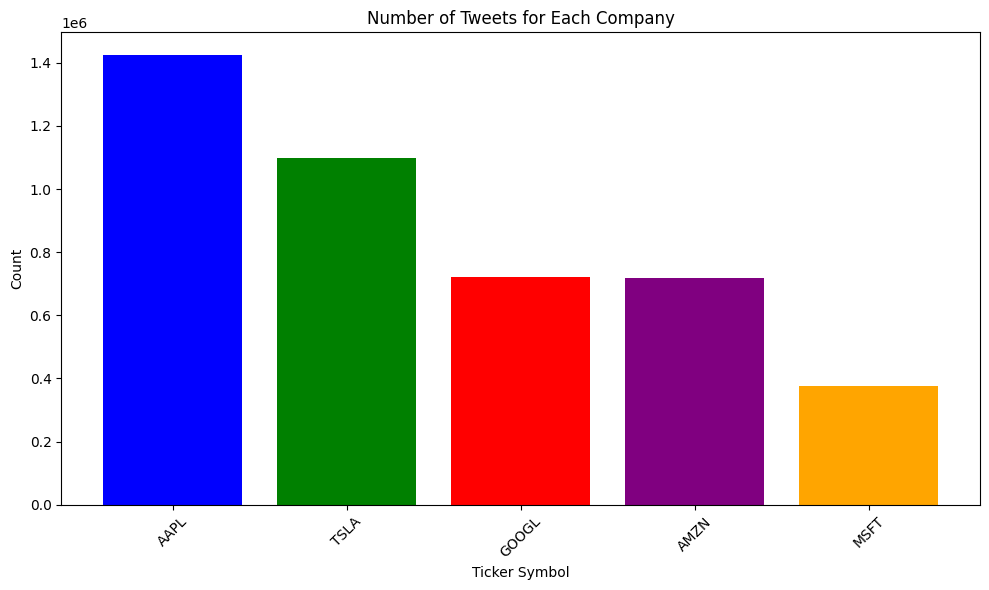

In [ ]:
# Bar plot for # of tweets per company
ticker_counts = tweet_company_merge['ticker_symbol'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(ticker_counts.index, ticker_counts.values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Ticker Symbol')
plt.ylabel('Count')
plt.title('Number of Tweets for Each Company')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
num_rows_merge = len(tweet_company_merge)
print("Number of rows in the tweet_company_merge:", num_rows_merge)

Number of rows in the tweet_company_merge: 4336445


In [ ]:
# Count # of tweets by month
ticker_dates = tweet_company_merge[['ticker_symbol', 'post_date']]
tweet_counts = ticker_dates.groupby(['ticker_symbol',
                                      ticker_dates['post_date'].dt.to_period("M")]).size().reset_index(level=[0,1])
tweet_counts['post_date'] = tweet_counts['post_date'].apply(lambda x: pd.to_datetime(str(x)))
tweet_counts.head()

,ticker_symbol,post_date,0
0,AAPL,2015-01-01,34308
1,AAPL,2015-02-01,34386
2,AAPL,2015-03-01,39951
3,AAPL,2015-04-01,37615
4,AAPL,2015-05-01,26054


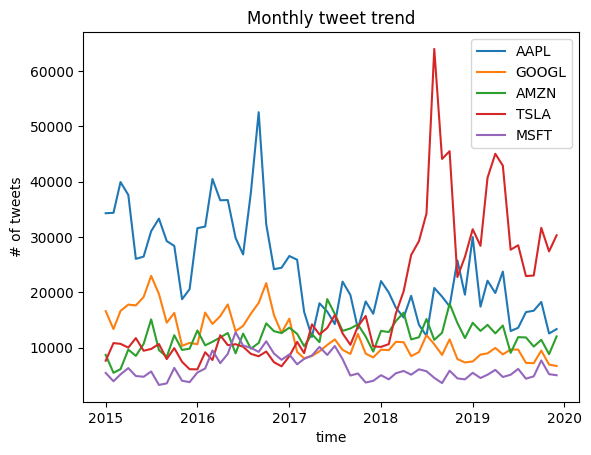

In [ ]:
# Plot to show monthly tweet trend per company
for ticker_symbol in company_df['ticker_symbol']:
  if ticker_symbol != 'GOOG':
    company_count = tweet_counts[tweet_counts['ticker_symbol']==ticker_symbol][['post_date', 0]].set_index('post_date')
    plt.plot(company_count, label=ticker_symbol)

plt.legend()
plt.ylabel('# of tweets')
plt.xlabel("time")
plt.title('Monthly tweet trend')
plt.show()

In [ ]:
# Check if every date has atleast 1 tweet
def check_tweets_for_each_ticker(df):
    date_ticker_counts = df.groupby(['post_date', 'ticker_symbol'])['tweet_id'].nunique()

    # Check if any combination of 'post_date' and 'ticker_symbol' has a count less than 1
    dates_missing_tweets = date_ticker_counts[date_ticker_counts < 1]

    if dates_missing_tweets.empty:
        print("All dates have at least one tweet for every ticker_symbol.")
    else:
        print("The following dates do not have at least one tweet for every ticker_symbol:")
        print(dates_missing_tweets)

check_tweets_for_each_ticker(tweet_company_merge)

All dates have at least one tweet for every ticker_symbol.


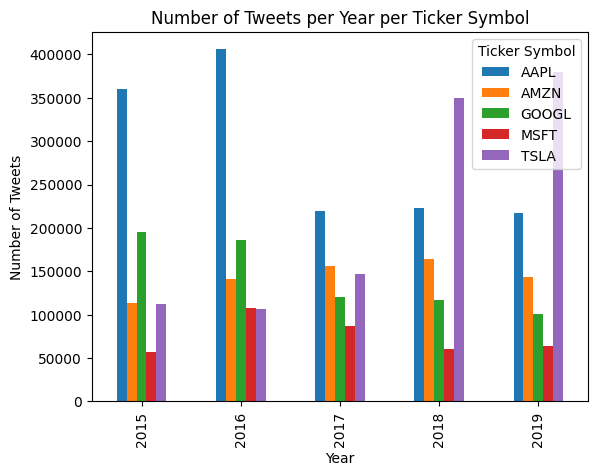

In [ ]:
tweet_company_merge['post_year'] = pd.to_datetime(tweet_company_merge['post_date']).dt.year

# Group by 'post_year' and 'ticker_symbol' and count the number of tweets
tweet_counts = tweet_company_merge.groupby(['post_year', 'ticker_symbol']).size().unstack(fill_value=0)

# Create the side-by-side bar graph
ax = tweet_counts.plot(kind='bar', stacked=False)
plt.xlabel('Year')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets per Year per Ticker Symbol')
plt.legend(title='Ticker Symbol', loc='upper right')
plt.show()

In [ ]:
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [ ]:
# Cleaning the tweets data

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def clean_tweet(text):
    # Remove links
    text = re.sub(r'http\S+', '', text)

    # Remove hashtags
    text = re.sub(r'#\w+', '', text)

    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)

    # Convert to lowercase and tokenize
    words = text.lower().split()

    # Remove stop words, lemmatize, and stem
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    # words = [stemmer.stem(word) for word in words]

    # Join the words back into a clean text
    clean_text = ' '.join(words)

    return clean_text
'''
# Apply the clean_tweet function to the 'body' column
cleaned_df = tweet_company_merge
cleaned_df['cleaned_body'] = cleaned_df['body'].apply(clean_tweet)

# Print the cleaned DataFrame
cleaned_df.head()
'''

In [ ]:
unique_symbols = tweet_company_merge['ticker_symbol'].unique()
unique_symbols

array(['AAPL', 'AMZN', 'TSLA', 'MSFT', 'GOOGL'], dtype=object)

### VADER SENTIMENT

In [ ]:
#!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
def perform_sentiment_analysis(df):
    # Initialize the VADER sentiment analyzer
    sia = SentimentIntensityAnalyzer()

    # Perform sentiment analysis for each 'body' in the DataFrame
    sentiment_scores = df['body'].apply(lambda x: sia.polarity_scores(x))

    # Map the sentiment scores to sentiment labels
    sentiment_labels = sentiment_scores.apply(lambda x: 'Positive' if x['compound'] > 0 else 'Negative' if x['compound'] < 0 else 'Neutral')

    # Add sentiment labels to the DataFrame
    df['VADER_sentiment'] = sentiment_labels

    return df

In [ ]:
perform_sentiment_analysis(tweet_company_merge)

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,date,time,post_year,VADER_sentiment
0,550441509175443456,VisualStockRSRC,2015-01-01 00:00:57,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,2015-01-01,00:00:57,2015,Neutral
1,550441672312512512,KeralaGuy77,2015-01-01 00:01:36,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,2015-01-01,00:01:36,2015,Negative
2,550441732014223360,DozenStocks,2015-01-01 00:01:50,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN,2015-01-01,00:01:50,2015,Negative
3,550442977802207232,ShowDreamCar,2015-01-01 00:06:47,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA,2015-01-01,00:06:47,2015,Neutral
4,550443807834402816,i_Know_First,2015-01-01 00:10:05,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,2015-01-01,00:10:05,2015,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...
4336440,1212159838882533376,ShortingIsFun,2019-12-31 23:53:21,In 2020 I may start Tweeting out positive news...,0,0,1,TSLA,2019-12-31,23:53:21,2019,Negative
4336441,1212160015332728833,Commuternyc,2019-12-31 23:54:03,Patiently Waiting for the no twitter sitter tw...,0,0,5,TSLA,2019-12-31,23:54:03,2019,Negative
4336442,1212160410692046849,MoriaCrypto,2019-12-31 23:55:37,I don't discriminate. I own both $aapl and $ms...,1,0,1,AAPL,2019-12-31,23:55:37,2019,Neutral
4336443,1212160410692046849,MoriaCrypto,2019-12-31 23:55:37,I don't discriminate. I own both $aapl and $ms...,1,0,1,MSFT,2019-12-31,23:55:37,2019,Neutral


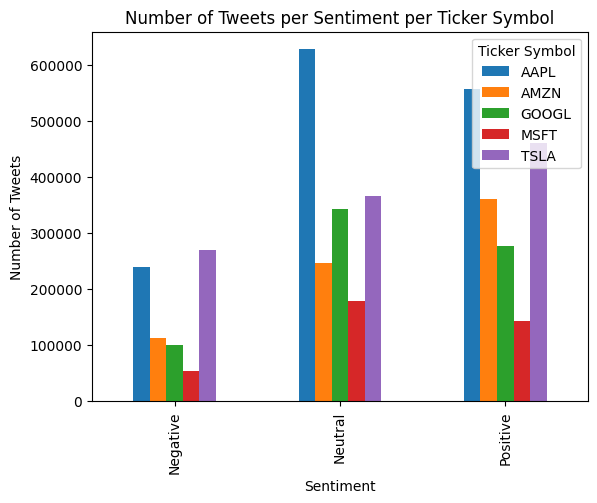

In [ ]:
# Group by 'sentiment' and 'ticker_symbol' and count the number of tweets
tweet_counts = tweet_company_merge.groupby(['VADER_sentiment', 'ticker_symbol']).size().unstack(fill_value=0)

# Create the side-by-side bar graph
ax = tweet_counts.plot(kind='bar', stacked=False)
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets per Sentiment per Ticker Symbol')
plt.legend(title='Ticker Symbol', loc='upper right')
plt.show()

In [ ]:
# Save the new dataframe

tweet_company_merge.to_parquet('/content/drive/MyDrive/DS 5500 - CAPSTONE PROJECT/tweet_company_merge.gzip',
              compression='gzip')


In [ ]:
# Read data from saved dataframe for future use

tweet_company_merge = pd.read_parquet('/content/drive/MyDrive/DS 5500 - CAPSTONE PROJECT/tweet_company_merge.gzip')
tweet_company_merge.head()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,date,time,post_year,VADER_sentiment
0,550441509175443456,VisualStockRSRC,2015-01-01 00:00:57,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,2015-01-01,00:00:57,2015,Neutral
1,550441672312512512,KeralaGuy77,2015-01-01 00:01:36,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,2015-01-01,00:01:36,2015,Negative
2,550441732014223360,DozenStocks,2015-01-01 00:01:50,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN,2015-01-01,00:01:50,2015,Negative
3,550442977802207232,ShowDreamCar,2015-01-01 00:06:47,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA,2015-01-01,00:06:47,2015,Neutral
4,550443807834402816,i_Know_First,2015-01-01 00:10:05,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,2015-01-01,00:10:05,2015,Neutral


In [ ]:
len(tweet_company_merge)

4336445

In [ ]:
# Create new dataframes for each ticker symbol
def filter_dataframe_by_ticker(df, ticker_symbol):
    filtered_df = df[df['ticker_symbol'] == ticker_symbol].reset_index(drop=True)
    return filtered_df


In [ ]:
df_aapl = filter_dataframe_by_ticker(tweet_company_merge,'AAPL')
df_amzn = filter_dataframe_by_ticker(tweet_company_merge,'AMZN')
df_tsla = filter_dataframe_by_ticker(tweet_company_merge,'TSLA')
df_msft = filter_dataframe_by_ticker(tweet_company_merge,'MSFT')
df_googl = filter_dataframe_by_ticker(tweet_company_merge,'GOOGL')


In [ ]:
# Get cleaned text
df_aapl['cleaned_body'] = df_aapl['body'].apply(clean_tweet)
df_amzn['cleaned_body'] = df_amzn['body'].apply(clean_tweet)
df_googl['cleaned_body'] = df_googl['body'].apply(clean_tweet)
df_msft['cleaned_body'] = df_msft['body'].apply(clean_tweet)
df_tsla['cleaned_body'] = df_tsla['body'].apply(clean_tweet)

In [ ]:
df_aapl.head()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,date,time,post_year,cleaned_body
0,550441509175443456,VisualStockRSRC,2015-01-01 00:00:57,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,2015-01-01,00:00:57,2015,lx21 made 10008 aapl check learn exe watt imrs...
1,550441672312512512,KeralaGuy77,2015-01-01 00:01:36,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,2015-01-01,00:01:36,2015,insanity today weirdo massive selling aapl bid...
2,550443807834402816,i_Know_First,2015-01-01 00:10:05,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,2015-01-01,00:10:05,2015,swing trading 891 return 14 day mww aapl tsla
3,550443808606126081,aaplstocknews,2015-01-01 00:10:05,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,2015-01-01,00:10:05,2015,swing trading 891 return 14 day mww aapl tsla
4,550443809700851716,iknowfirst,2015-01-01 00:10:05,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,2015-01-01,00:10:05,2015,swing trading 891 return 14 day mww aapl tsla


In [ ]:
# Create wordclouds for each stock

from wordcloud import WordCloud

def generate_word_cloud(df,ticker):
    # Combine all text in the 'body' column into a single string
    text = ' '.join(df['cleaned_body'])

    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for "{ticker}" Stock')
    plt.axis("off")
    plt.show()

def generate_word_cloud_unclean(ticker):
    # Combine all text in the 'body' column into a single string
    category = ticker
    filtered_cat = tweet_company_merge[tweet_company_merge['ticker_symbol'] == category]
    text = ' '.join(filtered_cat['body'])

    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for "{category}" Stock')
    plt.axis("off")
    plt.show()

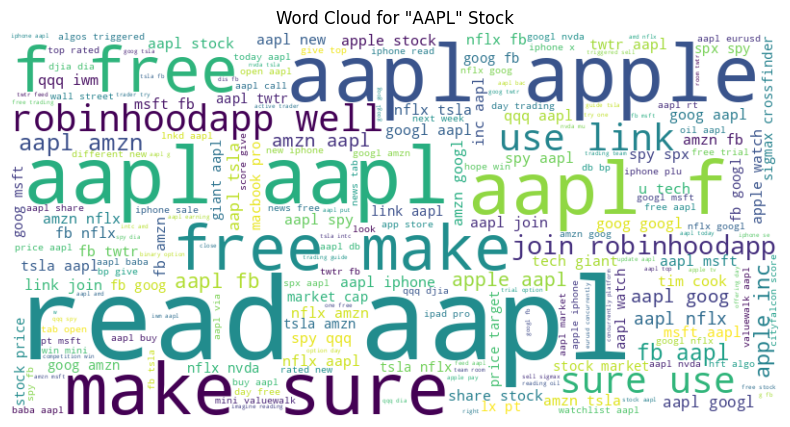

In [ ]:
generate_word_cloud(df_aapl,'AAPL')

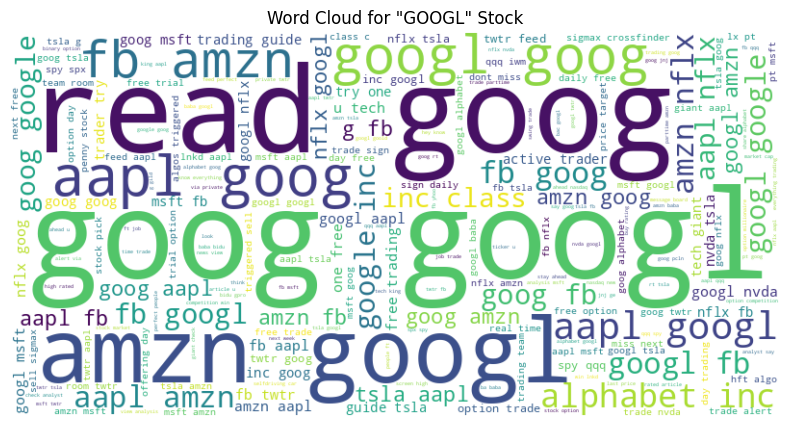

In [ ]:
generate_word_cloud(df_googl,'GOOGL')

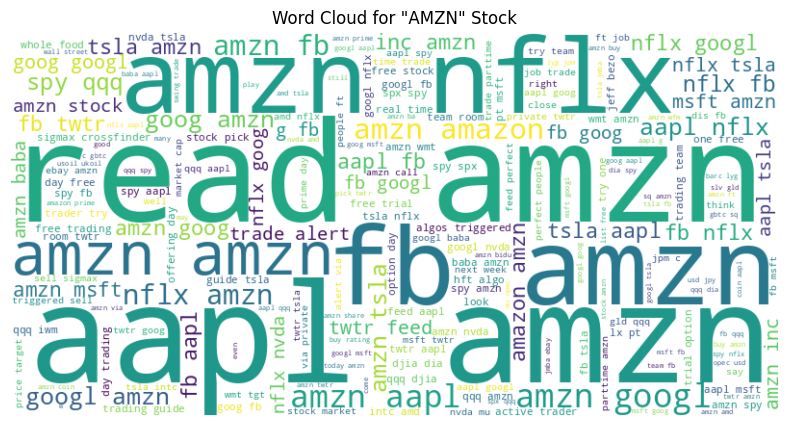

In [ ]:
generate_word_cloud(df_amzn,'AMZN')

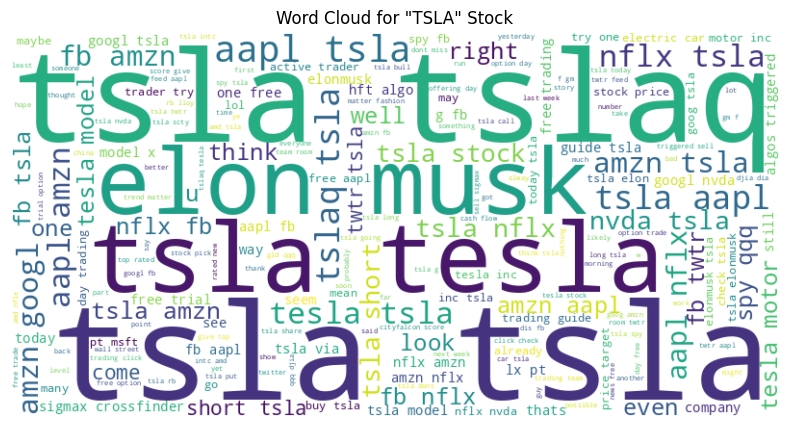

In [ ]:
generate_word_cloud(df_tsla,'TSLA')

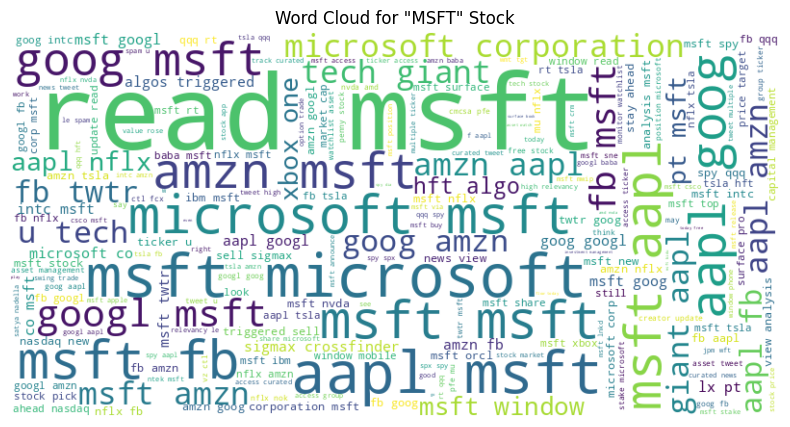

In [ ]:
generate_word_cloud(df_msft,'MSFT')

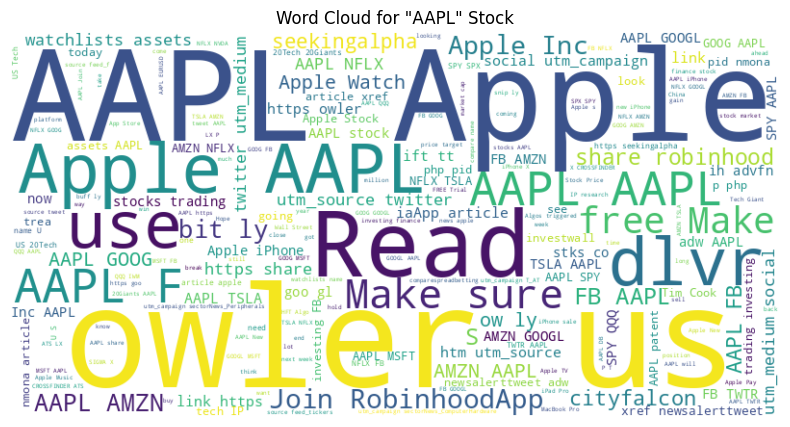

In [ ]:
generate_word_cloud_unclean('AAPL')